In [13]:
epochs = mne.Epochs(raw, eves, event_id=[1,2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)

Not setting metadata
254 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [23]:
import os
import sys
import mne
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
x1='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Chin EEG data/bdf data/042925/Q513_freqshift_noise.bdf'
#x2='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Chin EEG data/bdf data/042925/Q513_freqshift_nonoise+001.bdf'
raw1, eves1 = bs.importbdf(x1, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
#raw2, eves2 = bs.importbdf(x2, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
rawlist=[raw1]#,raw2]
eveslist=[eves1]#,eves2]
raw,eves=mne.concatenate_raws(rawlist, events_list=eveslist)


Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\MP\Chin EEG data\bdf data\042925\Q513_freqshift_noise.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8003583  =      0.000 ...   977.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
277 events found on stim channel Status
Event IDs: [  1   2 253]


In [24]:
raw.filter(2.,20.)
epochs_1= mne.Epochs(raw, eves, event_id=1, baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=2.2, reject=dict(eeg=200e-6))
epochs_2= mne.Epochs(raw, eves, event_id=2, baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=2.2, reject=dict(eeg=200e-6))
t_full=epochs_1.times
picks=(7,23,22,9,8,24)
ep1_all=(epochs_1.get_data()[:,picks,:]).mean(axis=1)
ep2_all=(epochs_2.get_data()[:,picks,:]).mean(axis=1)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 13517 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    7.2s


Not setting metadata
138 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
138 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 138 events and 20481 original time points ...
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A19']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20', 'A21']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A19']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejecting  epoch based on EEG : ['A18', 'A19', 'A20']
    Rejec

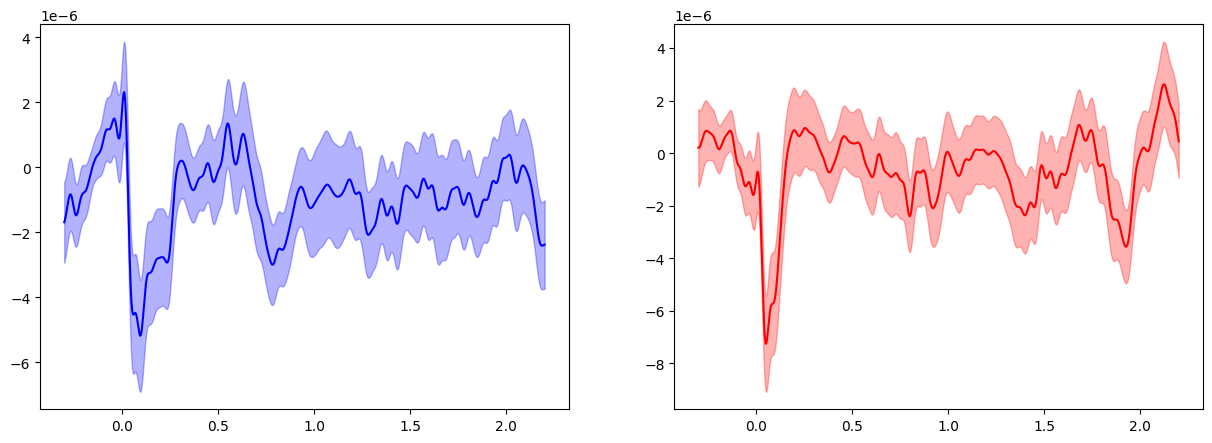

In [25]:
import numpy as np
import matplotlib.pyplot as plt
ep1_mean=ep1_all.mean(axis=0)
ep1_sem=ep1_all.std(axis=0)/np.sqrt(ep1_all.shape[0])
ep2_mean=ep2_all.mean(axis=0)
ep2_sem=ep2_all.std(axis=0)/np.sqrt(ep2_all.shape[0])


plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(t_full, ep1_mean,label='trig-1',color='blue')
plt.fill_between(t_full, ep1_mean-ep1_sem, ep1_mean+ep1_sem,alpha=0.3,color='blue')

plt.subplot(1,2,2)
plt.plot(t_full, ep2_mean,label='trig-2',color='red')
plt.fill_between(t_full, ep2_mean-ep2_sem, ep2_mean+ep2_sem,alpha=0.3,color='red')




In [25]:
import os
import sys
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
import mne
from scipy.io import savemat
import numpy as np
s1='Z:/data/UserTESTS/MP/Chin EEG/bdf data/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("0"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        
        for fl in fl2:
            if ("STM" in fl) & ~("bdf_" in fl):
                s3=s2+fl
                print(s3)
              
               
                raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                if eves.shape[0]==0:
                    continue
                    
                if raw.info["sfreq"]>8192:
                     raw, eves = raw.resample(8192, events=eves)
                raw.filter(1.,4.)
                if  "+00" in fl:
                    trig_list=eves[:,2]
                else:
                    trig_list = eves[1:len(eves),2]
                
        
                eid=np.ndarray.tolist(np.unique(trig_list))
                    
             
                if "_3stim" in fl:
                    epochs = mne.Epochs(raw, eves, event_id=eid, baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                else:
                    epochs = mne.Epochs(raw, eves, event_id=eid, baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                    
                t_full = epochs.times
                ep1=epochs.get_data()
                if len(trig_list[epochs.selection-1])!=ep1.shape[0]:
                    qwert
                
                
                
               
                
                    
                mat_gap = dict(epochs=epochs.get_data(), trig_list=trig_list[epochs.selection-1],t=t_full)
                w1=s3+'_theta.mat'
                print(w1)
                savemat(w1,mat_gap)
               
                        
               
        os.chdir(s1)        

Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
222 events found
Event IDs: [1 2]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.0s finished


Not setting metadata
222 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 222 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 221 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co+001.bdf_theta.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6225919  =      0.000 ...   760.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
157 events found
Event IDs: [1 2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.1s finished


Not setting metadata
157 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 157 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 157 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co+002.bdf_theta.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
222 events found
Event IDs: [  1   2 25

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.7s finished


Not setting metadata
221 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 221 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 220 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co.bdf_theta.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co_repeat+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
222 events found
Event

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.5s finished


Not setting metadata
222 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 222 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 221 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat+001.bdf_theta.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co_repeat+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6250495  =      0.000 ...   763.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
157 events 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.0s finished


Not setting metadata
157 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 157 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 157 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat+002.bdf_theta.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co_repeat.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
222 events found
E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.8s finished


Not setting metadata
221 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 221 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 220 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat.bdf_theta.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_dd_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
222 events found
Event 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.7s finished


Not setting metadata
222 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 222 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 221 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co+001.bdf_theta.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_dd_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6250495  =      0.000 ...   763.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
157 events found
Event 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.0s finished


Not setting metadata
157 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 157 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 157 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co+002.bdf_theta.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_dd_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
222 events found
Event IDs: [ 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.7s finished


Not setting metadata
221 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 221 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 220 events and 27853 original time points ...
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co.bdf_theta.mat


In [10]:
import mne
epochs = mne.Epochs(raw, eves, event_id=[1,2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)

Not setting metadata
347 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [1]:
import os
import sys
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
import mne
from scipy.io import savemat
import numpy as np
s1='Z:/data/UserTESTS/MP/Chin EEG/bdf data/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("0"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        for fl in fl2:
            if ("STM" in fl) & ~("bdf_" in fl):
                s3=s2+fl
                print(s3)
                raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                if eves.shape[0]==0:
                    continue
                if raw.info["sfreq"]>8192:
                    raw, eves = raw.resample(8192, events=eves)
                raw.filter(1.,90.)
                if "+00" in fl:
                    trig_list=eves[:,2]
                else:
                    trig_list=eves[1:len(eves),2]
                eid=np.ndarray.tolist(np.unique(trig_list))
                if len(eid)<2:
                    continue
                
                
                if "_3stim" in fl:
                    epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                    epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                else:
                    epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                    epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                
                mat_gap = dict(epochs_1=epochs_1.get_data(),epochs_2=epochs_2.get_data(),t=epochs_1.times)
                w1=s3+'_lp_90.mat'
                print(w1)
                savemat(w1,mat_gap)
        os.chdir(s1)
                
                
            
        

Z:/data/UserTESTS/MP/Chin EEG/bdf data/062124/Q472_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062124\Q472_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2555903  =      0.000 ...   312.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
101 events found
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cut

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s


Not setting metadata
51 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
49 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 51 events and 19661 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    6.5s finished


0 bad epochs dropped
Using data from preloaded Raw for 49 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062124/Q472_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062124/Q472_STM_1co_55dB.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062124\Q472_STM_1co_55dB.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4538367  =      0.000 ...   554.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
177 events found
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass fi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.7s finished


Not setting metadata
86 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 86 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 90 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062124/Q472_STM_1co_55dB.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q468_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062224\Q468_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6479871  =      0.000 ...   791.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   15.2s finished


Not setting metadata
128 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
126 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 128 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 126 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q468_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q468_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062224\Q468_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.4s finished


Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
186 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 186 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q468_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q468_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062224\Q468_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.0s finished


Not setting metadata
128 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
125 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 128 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 125 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q468_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q468_STM_2co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062224\Q468_STM_2co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3284991  =      0.000 ...   401.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.0s finished


Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
187 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 187 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q468_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q469_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062224\Q469_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6537215  =      0.000 ...   798.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.9s finished


Not setting metadata
128 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
125 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 128 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 125 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q469_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q469_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062224\Q469_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.4s finished


Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
187 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 187 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q469_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q469_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062224\Q469_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5537791  =      0.000 ...   676.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.0s finished


Not setting metadata
110 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
109 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 110 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 109 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q469_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q469_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\062224\Q469_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.4s finished


Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
187 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 187 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/062224/Q469_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070224/Q472_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070224\Q472_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3227647  =      0.000 ...   197.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero ini

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s


Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
23 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 19661 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    3.8s finished


0 bad epochs dropped
Using data from preloaded Raw for 23 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070224/Q472_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070224/Q472_STM_1co_1.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070224\Q472_STM_1co_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8388607  =      0.000 ...  1024.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
291 events found
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.4s finished


Not setting metadata
133 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
157 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 133 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 157 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070224/Q472_STM_1co_1.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070224/Q472_STM_1co_2.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070224\Q472_STM_1co_2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5038079  =      0.000 ...   615.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-ze

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.3s finished


Not setting metadata
85 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
87 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 85 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 87 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070224/Q472_STM_1co_2.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q468_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q468_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8650751  =      0.000 ...  1056.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-ze

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.2s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q468_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q468_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q468_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q468_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q468_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q468_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8626175  =      0.000 ...  1053.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.2s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q468_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q468_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q468_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q468_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q469_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8667135  =      0.000 ...  1058.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.3s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q469_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.6s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_1co_2+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q469_STM_1co_2+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6307839  =      0.000 ...   770.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.6s finished


Not setting metadata
108 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
110 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 108 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 110 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_1co_2+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_1co_2.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q469_STM_1co_2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a no

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_1co_2.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q469_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8052735  =      0.000 ...   983.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a no

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   17.0s finished


Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
144 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 136 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 144 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\070324\Q469_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/070324/Q469_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071024/Q472_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071024\Q472_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8626175  =      0.000 ...  1053.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.3s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071024/Q472_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071024/Q472_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071024\Q472_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.0s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071024/Q472_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071024/Q472_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071024\Q472_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8658943  =      0.000 ...  1057.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.3s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071024/Q472_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071024/Q472_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071024\Q472_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.9s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071024/Q472_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071124/Q469_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071124\Q469_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8634367  =      0.000 ...  1054.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.4s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071124/Q469_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071124/Q469_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071124\Q469_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.0s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071124/Q469_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071124/Q469_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071124\Q469_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8634367  =      0.000 ...  1054.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.1s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071124/Q469_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071124/Q469_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071124\Q469_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071124/Q469_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071324\Q448_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.0s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071324\Q448_STM_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16383  =      0.000 ...     2.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a no

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.4s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071324\Q448_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8634367  =      0.000 ...  1054.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.5s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071324\Q448_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.2s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_n_n.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071324\Q448_STM_n_n.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8716287  =      0.000 ...  1064.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero ini

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
161 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 161 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071324/Q448_STM_n_n.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8626175  =      0.000 ...  1053.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.9s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8650751  =      0.000 ...  1056.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.8s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.6s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_N_N.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_N_N.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4734975  =      0.000 ...   578.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero ini

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.4s finished


Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
76 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 75 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 76 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_N_N.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_n_n_1+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_n_n_1+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 57343  =      0.000 ...     7.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-ze

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_n_n_1.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_n_n_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.1s finished


Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
300 events found
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 22.50 Hz (-6 dB cutoff frequency: 101.25 Hz)
- Filter length: 27035 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.7s finished


Not setting metadata
138 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
161 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 138 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 161 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_n_n_1.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_oldstim_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_oldstim_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8626175  =      0.000 ...  1053.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.8s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_oldstim_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_oldstim_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_oldstim_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.8s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_oldstim_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_oldstim_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_oldstim_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8634367  =      0.000 ...  1054.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_oldstim_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_oldstim_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071424\Q436_STM_oldstim_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.8s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071424/Q436_STM_oldstim_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071524/Q444_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071524\Q444_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8658943  =      0.000 ...  1057.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel ha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   17.9s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
151 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 151 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071524/Q444_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071524/Q444_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071524\Q444_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.9s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
161 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 161 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071524/Q444_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071524/Q444_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071524\Q444_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2850815  =      0.000 ...   348.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


Not setting metadata
45 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
53 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 45 events and 19661 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    6.1s finished


0 bad epochs dropped
Using data from preloaded Raw for 53 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071524/Q444_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071524/Q444_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071524\Q444_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
303 events found
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.5s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071524/Q444_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071624/Q472_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071624\Q472_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2564095  =      0.000 ...   313.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero ini

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


Not setting metadata
46 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
41 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.5s finished


Using data from preloaded Raw for 46 events and 19661 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 41 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071624/Q472_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071624/Q472_STM_n_n.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071624\Q472_STM_n_n.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8708095  =      0.000 ...  1063.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
301 events found
Event IDs: [  1   2 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 90 Hz

FIR filter parameters
---------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.6s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
161 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 161 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071624/Q472_STM_n_n.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8642559  =      0.000 ...  1055.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.9s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.4s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_1co_1+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_1co_1+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8642559  =      0.000 ...  1055.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.9s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_1co_1+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_1co_1.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_1co_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a no

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.8s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_1co_1.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8634367  =      0.000 ...  1054.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a no

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.9s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.5s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_3stim+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_3stim+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.1s finished


Not setting metadata
103 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 103 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 119 events and 27853 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_3stim+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_3stim+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_3stim+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6225919  =      0.000 ...   760.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.1s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
78 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 78 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_3stim+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_3stim.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\071724\Q448_STM_3stim.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-ze

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.6s finished


Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 106 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/071724/Q448_STM_3stim.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 24854527  =      0.000 ...  1517.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   28.1s finished


Not setting metadata
201 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
229 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 201 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 229 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co_1+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_1co_1+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8667135  =      0.000 ...  1058.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.7s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co_1+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co_1.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_1co_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a no

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.0s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co_1.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co_old+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_1co_old+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8626175  =      0.000 ...  1053.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.4s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co_old+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co_old.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_1co_old.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel ha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.0s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_1co_old.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8601599  =      0.000 ...  1050.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   22.2s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.0s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_2co_old+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_2co_old+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8642559  =      0.000 ...  1055.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel ha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.5s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
151 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 151 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_2co_old+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_2co_old.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072024\Q436_STM_2co_old.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel ha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.4s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
161 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 161 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072024/Q436_STM_2co_old.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072124\Q448_STM_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8601599  =      0.000 ...  1050.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.9s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072124\Q448_STM_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.1s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_old_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072124\Q448_STM_old_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8626175  =      0.000 ...  1053.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel ha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.3s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_old_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_old_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072124\Q448_STM_old_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel ha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.2s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_old_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_old_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072124\Q448_STM_old_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8675327  =      0.000 ...  1059.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.9s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_old_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_old_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072124\Q448_STM_old_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel ha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.6s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072124/Q448_STM_old_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072324/Q444_STM_oldstim_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072324\Q444_STM_oldstim_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8609791  =      0.000 ...  1051.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.5s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072324/Q444_STM_oldstim_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072324/Q444_STM_oldstim_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072324\Q444_STM_oldstim_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.3s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 163 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072324/Q444_STM_oldstim_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072324/Q444_STM_oldstim_2co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072324\Q444_STM_oldstim_2co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8642559  =      0.000 ...  1055.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.3s finished


Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
150 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 149 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 150 events and 19661 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072324/Q444_STM_oldstim_2co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072324/Q444_STM_oldstim_2co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072324\Q444_STM_oldstim_2co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.0s finished


Not setting metadata
139 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 139 events and 19661 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 162 events and 19661 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072324/Q444_STM_oldstim_2co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q436_STM_3stim_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q436_STM_3stim_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.9s finished


Not setting metadata
104 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 104 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 119 events and 27853 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q436_STM_3stim_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q436_STM_3stim_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q436_STM_3stim_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6242303  =      0.000 ...   762.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.5s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
78 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 78 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q436_STM_3stim_1co+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q436_STM_3stim_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q436_STM_3stim_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.1s finished


Not setting metadata
105 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 105 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q436_STM_3stim_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q436_STM_dd_3stim_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q436_STM_dd_3stim_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4325375  =      0.000 ...   528.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.6s finished


Not setting metadata
54 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
54 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 54 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 54 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q436_STM_dd_3stim_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.2s finished


Not setting metadata
103 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 103 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 119 events and 27853 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6225919  =      0.000 ...   760.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.7s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
78 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 78 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_1co+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.1s finished


Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 106 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_dd_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   20.3s finished


Not setting metadata
103 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 103 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 119 events and 27853 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_dd_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6242303  =      0.000 ...   762.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.6s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
78 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 78 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_dd_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.6s finished


Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 106 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co_repeat+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_dd_1co_repeat+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.4s finished


Not setting metadata
104 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
118 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 104 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 118 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co_repeat+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co_repeat+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_dd_1co_repeat+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6291455  =      0.000 ...   768.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.4s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co_repeat+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co_repeat.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072624\Q448_STM_3stim_dd_1co_repeat.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.6s finished


Not setting metadata
105 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 105 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072624/Q448_STM_3stim_dd_1co_repeat.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072824\Q444_STM_3stim_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.1s finished


Not setting metadata
104 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
118 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 104 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 118 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072824\Q444_STM_3stim_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6234111  =      0.000 ...   761.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.5s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 79 events and 27853 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_1co+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072824\Q444_STM_3stim_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.5s finished


Not setting metadata
105 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 105 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_dd_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072824\Q444_STM_3stim_dd_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.0s finished


Not setting metadata
104 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
118 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 104 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 118 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_dd_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_dd_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072824\Q444_STM_3stim_dd_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6266879  =      0.000 ...   765.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.4s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_dd_1co+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_dd_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072824\Q444_STM_3stim_dd_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.6s finished


Not setting metadata
105 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 105 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072824/Q444_STM_3stim_dd_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.5s finished


Not setting metadata
103 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 103 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 119 events and 27853 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6225919  =      0.000 ...   760.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trig

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.9s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
78 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 78 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.6s finished


Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 106 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co_repeat+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.9s finished


Not setting metadata
103 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 103 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 119 events and 27853 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co_repeat+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6250495  =      0.000 ...   763.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.2s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
78 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 78 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_1co_repeat.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   18.7s finished


Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 106 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_1co_repeat.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_dd_1co+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   19.5s finished


Not setting metadata
103 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 103 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 119 events and 27853 original time points ...
1 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co+001.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_dd_1co+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6250495  =      0.000 ...   763.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.4s finished


Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
78 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 79 events and 27853 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 78 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co+002.bdf_lp_90.mat
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Chin EEG\bdf data\072924\Q436_STM_3stim_dd_1co.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   21.0s finished


Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 106 events and 27853 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 115 events and 27853 original time points ...
0 bad epochs dropped
Z:/data/UserTESTS/MP/Chin EEG/bdf data/072924/Q436_STM_3stim_dd_1co.bdf_lp_90.mat


In [20]:
import os
import sys
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import mne
from scipy.io import savemat
import numpy as np
s1='Z:/data/UserTESTS/MP/Human EEG data/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("MP"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        for fl in fl2:
            if ("MP" in fl) & ~("bdf_" in fl):
                s3=s2+fl
                print(s3)
                raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                if eves.shape[0]==0:
                    continue
                if raw.info["sfreq"]>8192:
                    raw, eves = raw.resample(8192, events=eves)
                raw.filter(8.,12.)
                blinks = find_blinks(raw)
                epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
                blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
                raw.add_proj(blink_proj)
                if "+00" in fl:
                    trig_list=eves[:,2]
                else:
                    trig_list=eves[1:len(eves),2]
                eid=np.ndarray.tolist(np.unique(trig_list))
                if len(eid)<2:
                    continue
                
                
                if "_3stim" in fl:
                    epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                    epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=3.20)
                else:
                    epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                    epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
                
                mat_gap = dict(epochs_1=epochs_1.get_data(),epochs_2=epochs_2.get_data(),t=epochs_1.times)
                w1=s3+'_alpha.mat'
                print(w1)
                savemat(w1,mat_gap)
        os.chdir(s1)
                
                
            

Z:/data/UserTESTS/MP/Human EEG data/MP_ACC_ACT/MP_ACT_2co_ModDepth1.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Human EEG data\MP_ACC_ACT\MP_ACT_2co_ModDepth1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10051583  =      0.000 ...  1227.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130560 (consider using initial_event=True to detect this event)
501 events found
Event IDs: [  1   2   3 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.9s finished


Setting up band-pass filter from 0.5 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.15 Hz (-6 dB cutoff frequency: 0.42 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 180225 samples (22.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [13]:
raw, eves = bs.importbdf('Z:/data/UserTESTS/MP/Human EEG data/MP_ACC_ACT/MP_ACT_2co_ModDepth_point4.bdf', verbose='DEBUG',refchans=['EXG1', 'EXG2'])

Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Human EEG data\MP_ACC_ACT\MP_ACT_2co_ModDepth_point4.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130560 (consider using initial_event=True to detect this event)
436 events found
Event IDs: [  1   2   3 253]


In [1]:
### human bdf to mat MP
import os
import sys
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import mne
from scipy.io import savemat
import numpy as np
from anlffr.preproc import find_blinks
x1='Z:/data/UserTESTS/MP/Human EEG data/S381/'
s1='S381_STM_MP.bdf'
raw, eves = bs.importbdf(x1+s1, verbose='DEBUG',refchans=['EXG1','EXG2'])
raw.filter(1.,40.)

blinks = find_blinks(raw)
epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
raw.add_proj(blink_proj)

epochs_1 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
epochs_2 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
epochs_3 = mne.Epochs(raw, eves, event_id=[3], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)
epochs_4 = mne.Epochs(raw, eves, event_id=[4], baseline=(-0.09, 0), proj=True,tmin=-0.20, tmax=2.20)

mat_gap = dict(epochs_1=epochs_1.get_data(),epochs_2=epochs_2.get_data(),epochs_3=epochs_3.get_data(),epochs_4=epochs_4.get_data(),t=epochs_1.times)
w1=s3+'_1-40.mat'
print(w1)
savemat(w1,mat_gap)

Loading a default 32 channel montage.
Extracting EDF parameters from Z:\data\UserTESTS\MP\Human EEG data\S381\S381_STM_MP.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
436 events found
Event IDs: [  1   2   3   4 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   17.8s finished


Setting up band-pass filter from 0.5 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.15 Hz (-6 dB cutoff frequency: 0.42 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 180225 samples (22.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [1]:
import sys
import os
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import numpy as np
import mne
from scipy.io import savemat
s1='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("S"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        for fl in fl2:
            if (("Binding" in fl) & ~("bdf_" in fl)) & ~("ABR" in fl):
                s3=s2+fl
                print(s3)
                try:
                    raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                    if eves.shape[0]==0:
                        continue
                    if raw.info["sfreq"]>4096:
                        raw, eves = raw.resample(4096, events=eves)
                    raw.filter(4.,7.)
                    if "+00" in fl:
                        trig_list=eves[:,2]
                    else:
                        trig_list=eves[1:len(eves),2]
                    eid=np.ndarray.tolist(np.unique(trig_list))
                
                    #blinks = find_blinks(raw)
                    #epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)
                    #blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=1)
                    #raw.add_proj(blink_proj)
                    
                    epochs_12 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=5.3)
                    epochs_20 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=5.3)
                    
                    t_full=epochs_12.times
                    mat_gap=dict(epochs_12=epochs_12.get_data(),epochs_20=epochs_20.get_data(), t=t_full)     
                    w1=s3+'_theta.mat'
                    print(w1)
                    savemat(w1,mat_gap)
                except:
                    continue
        os.chdir(s1)

//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S069_Binding/S069_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S069_Binding\S069_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
265 events found
Event IDs: [1 2]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB sto

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.6s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S069_Binding/S069_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S069_Binding/S069_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S069_Binding\S069_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.6s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S069_Binding/S069_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S072_Binding/S072_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S072_Binding\S072_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.3s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S072_Binding/S072_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S072_Binding/S072_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S072_Binding\S072_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.6s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S072_Binding/S072_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S078_Binding/S078_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S078_Binding\S078_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.9s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S078_Binding/S078_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S078_Binding/S078_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S078_Binding\S078_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.6s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S078_Binding/S078_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S088_Binding/S088_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S088_Binding\S088_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6782975  =      0.000 ...  1656.000 secs..

C:\Users\mpatra\AppData\Roaming\Python\Python311\site-packages\anlffr-0.3.0a1-py3.11.egg\anlffr\helper\biosemi2mne.py:86: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = read_raw_bdf(bdfname, preload=True, misc=misc, exclude=exclude,


Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
260 events found
Event IDs: [1 2]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 13517 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.6s finished


Not setting metadata
126 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
134 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 126 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 134 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S088_Binding/S088_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S088_Binding/S088_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S088_Binding\S088_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.1s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S088_Binding/S088_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S104_Binding/S104_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S104_Binding\S104_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.6s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S104_Binding/S104_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S104_Binding/S104_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S104_Binding\S104_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.2s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S104_Binding/S104_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S105_Binding/S105_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S105_Binding\S105_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.5s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S105_Binding/S105_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S105_Binding/S105_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S105_Binding\S105_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.7s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S105_Binding/S105_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S207_Binding/S207_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S207_Binding\S207_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.4s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S207_Binding/S207_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S207_Binding/S207_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S207_Binding\S207_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.7s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S207_Binding/S207_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S259_Binding/S259_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S259_Binding\S259_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.8s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S259_Binding/S259_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S259_Binding/S259_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S259_Binding\S259_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.9s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S259_Binding/S259_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S260_Binding/S260_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S260_Binding\S260_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.3s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S260_Binding/S260_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S260_Binding/S260_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S260_Binding\S260_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.8s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S260_Binding/S260_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S268_Binding/S268_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S268_Binding\S268_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.3s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S268_Binding/S268_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S268_Binding/S268_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S268_Binding\S268_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.1s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S268_Binding/S268_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S269_Binding/S269_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S269_Binding\S269_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.2s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S269_Binding/S269_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S269_Binding/S269_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S269_Binding\S269_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.7s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S269_Binding/S269_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S270_Binding/S270_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S270_Binding\S270_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.4s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S270_Binding/S270_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S270_Binding/S270_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S270_Binding\S270_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.6s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S270_Binding/S270_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S271_Binding/S271_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S271_Binding\S271_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.3s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S271_Binding/S271_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S271_Binding/S271_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S271_Binding\S271_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.7s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S271_Binding/S271_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S272_Binding/S270_Binding
Loading a default 32 channel montage.
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S272_Binding/S272_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S272_Binding\S272_Binding+001.b

C:\Users\mpatra\AppData\Roaming\Python\Python311\site-packages\anlffr-0.3.0a1-py3.11.egg\anlffr\helper\biosemi2mne.py:86: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = read_raw_bdf(bdfname, preload=True, misc=misc, exclude=exclude,


Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
265 events found
Event IDs: [1 2]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 13517 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.5s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S272_Binding/S272_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S272_Binding/S272_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S272_Binding\S272_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.4s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S272_Binding/S272_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S273_Binding/S273_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S273_Binding\S273_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.0s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S273_Binding/S273_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S273_Binding/S273_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S273_Binding\S273_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.8s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S273_Binding/S273_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S274_Binding/S274_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S274_Binding\S274_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.8s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S274_Binding/S274_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S274_Binding/S274_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S274_Binding\S274_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.8s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S274_Binding/S274_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S277_Binding/S277_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S277_Binding\S277_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

C:\Users\mpatra\AppData\Roaming\Python\Python311\site-packages\anlffr-0.3.0a1-py3.11.egg\anlffr\helper\biosemi2mne.py:86: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = read_raw_bdf(bdfname, preload=True, misc=misc, exclude=exclude,


Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
265 events found
Event IDs: [1 2]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 13517 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    7.7s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S277_Binding/S277_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S277_Binding/S277_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S277_Binding\S277_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.6s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S277_Binding/S277_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S280_Binding/S280_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S280_Binding\S280_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.1s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S280_Binding/S280_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S280_Binding/S280_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S280_Binding\S280_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.2s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S280_Binding/S280_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S281_Binding/S281_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S281_Binding\S281_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.5s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S281_Binding/S281_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S281_Binding/S281_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S281_Binding\S281_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.1s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S281_Binding/S281_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S282_Binding/S282_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S282_Binding\S282_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.8s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S282_Binding/S282_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S282_Binding/S282_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S282_Binding\S282_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.1s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S282_Binding/S282_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S284_Binding/S284_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S284_Binding\S284_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6914047  =      0.000 ...  1688.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.0s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S284_Binding/S284_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S284_Binding/S284_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S284_Binding\S284_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.8s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S284_Binding/S284_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S285_Binding/S285_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S285_Binding\S285_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.7s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S285_Binding/S285_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S285_Binding/S285_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S285_Binding\S285_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.1s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S285_Binding/S285_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S288_Binding/S288_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S288_Binding\S288_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.5s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S288_Binding/S288_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S288_Binding/S288_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S288_Binding\S288_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.9s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S288_Binding/S288_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S291_Binding/S291_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S291_Binding\S291_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6914047  =      0.000 ...  1688.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.6s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S291_Binding/S291_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S291_Binding/S291_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S291_Binding\S291_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.5s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S291_Binding/S291_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S303_Binding/S303_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S303_Binding\S303_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6914047  =      0.000 ...  1688.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.6s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S303_Binding/S303_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S303_Binding/S303_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S303_Binding\S303_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.4s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S303_Binding/S303_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S305_Binding/S305_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S305_Binding\S305_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.8s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S305_Binding/S305_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S305_Binding/S305_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S305_Binding\S305_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.9s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S305_Binding/S305_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S308_Binding/S308_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S308_Binding\S308_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.0s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S308_Binding/S308_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S308_Binding/S308_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S308_Binding\S308_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.2s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S308_Binding/S308_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S309_Binding/S309_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S309_Binding\S309_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.8s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S309_Binding/S309_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S309_Binding/S309_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S309_Binding\S309_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.4s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S309_Binding/S309_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S310_Binding/S310_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S310_Binding\S310_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6918143  =      0.000 ...  1689.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.7s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S310_Binding/S310_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S310_Binding/S310_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S310_Binding\S310_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   14.7s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S310_Binding/S310_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S312_Binding/S312_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S312_Binding\S312_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.3s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S312_Binding/S312_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S312_Binding/S312_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S312_Binding\S312_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   13.7s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S312_Binding/S312_Binding.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S358_Binding/S358_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S358_Binding\S358_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6922239  =      0.000 ...  1690.000 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.4s finished


Not setting metadata
129 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 129 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 136 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S358_Binding/S358_Binding+001.bdf_delta.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S358_Binding/S358_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\human_binding\S358_Binding\S358_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   12.9s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 164 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/human_binding/S358_Binding/S358_Binding.bdf_delta.mat


In [3]:
import sys
import os
sys.path.append('C:/Users/mpatra/Downloads/EEG/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import numpy as np
import mne
from scipy.io import savemat
s1='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/'
os.chdir(s1)
fln=os.listdir()
for file in fln:
    if file.startswith("Q"):
        s2=s1+file+'/'
        os.chdir(s2)
        fl2=os.listdir()
        for fl in fl2:
            if (("Binding" in fl) & ~("bdf_" in fl)) & ~("ABR" in fl):
                s3=s2+fl
                print(s3)
                try:
                    raw, eves = bs.importbdf(s3, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
                    if eves.shape[0]==0:
                        continue
                    if raw.info["sfreq"]>4096:
                        raw, eves = raw.resample(4096, events=eves)
                    raw.filter(8.,12.)
                    if "+00" in fl:
                        trig_list=eves[:,2]
                    else:
                        trig_list=eves[1:len(eves),2]
                    eid=np.ndarray.tolist(np.unique(trig_list))
                    epochs_12 = mne.Epochs(raw, eves, event_id=[1], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=5.3)
                    t_full=epochs_12.times
                    if len(eid)>1:
                        epochs_8 = mne.Epochs(raw, eves, event_id=[2], baseline=(-0.3, 0), proj=True,tmin=-0.3, tmax=5.3)
                        mat_gap=dict(epochs_12=epochs_12.get_data(),epochs_8=epochs_8.get_data(),t=t_full)
                    else:
                        mat_gap=dict(epochs_12=epochs_12.get_data(),t=t_full)
                    w1=s3+'_alpha.mat'
                    print(w1)
                    savemat(w1,mat_gap)
                except:
                    continue
        os.chdir(s1)

//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q412/Q412_Awake_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q412\Q412_Awake_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
170 events found
Event IDs: [1]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- L

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.4s finished


Not setting metadata
170 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 170 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q412/Q412_Awake_Binding+001.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q412/Q412_Awake_Binding+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q412\Q412_Awake_Binding+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 811007  =      0.000 ...    99.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
16 events found
E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
16 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 16 events and 22939 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.5s finished


1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q412/Q412_Awake_Binding+002.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q412/Q412_Awake_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q412\Q412_Awake_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
172 events found
Event IDs: [  1 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.0s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q412/Q412_Awake_Binding.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414/Q414_Awake_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q414\Q414_Awake_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
171 events found
Eve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.4s finished


Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
81 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 90 events and 22939 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 81 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414/Q414_Awake_Binding+001.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414/Q414_Awake_Binding+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q414\Q414_Awake_Binding+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3432447  =      0.000 ...   419.000 secs...
Re-referencing data to: EXG1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Not setting metadata
27 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
32 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    2.5s finished


Using data from preloaded Raw for 27 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 32 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414/Q414_Awake_Binding+002.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414/Q414_Awake_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q414\Q414_Awake_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
170 events found
Event IDs: [1 2]
Filterin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.1s finished


Not setting metadata
93 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
77 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 93 events and 22939 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 77 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414/Q414_Awake_Binding.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414_1/Q414_1_Awake_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q414_1\Q414_1_Awake_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 540671  =      0.000 ...   132.000 secs...
Re-referencing data to: E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
20 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 20 events and 22939 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.6s finished


//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414_1/Q414_1_Awake_Binding+001.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414_1/Q414_1_Awake_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q414_1\Q414_1_Awake_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
343 events found
Event IDs: [  1 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.5s finished


Not setting metadata
342 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 342 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414_1/Q414_1_Awake_Binding.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414_2/Q414_2_Awake_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q414_2\Q414_2_Awake_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1556479  =      0.000 ...   380.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
58 event

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
58 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 58 events and 22939 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.8s finished


0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414_2/Q414_2_Awake_Binding+001.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414_2/Q414_2_Awake_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q414_2\Q414_2_Awake_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
343 events found
Event IDs: [  1 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-ca

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   11.3s finished


Not setting metadata
342 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 342 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q414_2/Q414_2_Awake_Binding.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q415/Q415_Awake_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q415\Q415_Awake_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6848511  =      0.000 ...  1672.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
268 events found

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    8.9s finished


Not setting metadata
125 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
143 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 125 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 143 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q415/Q415_Awake_Binding+001.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q415/Q415_Awake_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q415\Q415_Awake_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re-referencing data to: EXG1 EXG

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.9s finished


Not setting metadata
179 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
156 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 179 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 156 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q415/Q415_Awake_Binding.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q417/Q417_Awake_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q417\Q417_Awake_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.4s finished


Not setting metadata
76 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
94 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 76 events and 22939 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 94 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q417/Q417_Awake_Binding+001.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q417/Q417_Awake_Binding+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q417\Q417_Awake_Binding+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 540671  =      0.000 ...    66.000 secs...
Re-referencing data to: EXG1 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
5 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
4 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.3s finished


Using data from preloaded Raw for 5 events and 22939 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 4 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q417/Q417_Awake_Binding+002.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q417/Q417_Awake_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q417\Q417_Awake_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
171 events found
Event IDs: [1 2]
Filtering 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.2s finished


Not setting metadata
94 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
77 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 94 events and 22939 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 77 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q417/Q417_Awake_Binding.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_1_Awake_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q419\Q419_1_Awake_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1589247  =      0.000 ...   388.000 secs...
Re-referencing data to: EXG1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
59 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 59 events and 22939 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.8s finished


0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_1_Awake_Binding+001.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_1_Awake_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q419\Q419_1_Awake_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8728575  =      0.000 ...  2131.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
342 events found
Event IDs: [  1 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   10.5s finished


Not setting metadata
341 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 341 events and 22939 original time points ...
0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_1_Awake_Binding.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_Awake_Binding+001.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q419\Q419_Awake_Binding+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
170 events found
E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.4s finished


Not setting metadata
170 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 170 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_Awake_Binding+001.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_Awake_Binding+002.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q419\Q419_Awake_Binding+002.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557055  =      0.000 ...    68.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
10 events found
E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 10 events and 22939 original time points ...


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.3s finished


0 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_Awake_Binding+002.bdf_alpha.mat
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_Awake_Binding.bdf
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\bdf data\Awake\Q419\Q419_Awake_Binding.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8724479  =      0.000 ...  1065.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
172 events found
Event IDs: [  1 253]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpas

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.0s finished


Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 171 events and 22939 original time points ...
1 bad epochs dropped
//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/bdf data/Awake/Q419/Q419_Awake_Binding.bdf_alpha.mat


In [1]:
import sys
import os
sys.path.append('C:/Users/amukesh/Downloads/ANLffr-master/')
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import numpy as np
import mne
from scipy.io import savemat
fl1='ACT_ACC_Samantha.bdf'
x1='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/MP/Human EEG data/SH/'+fl1
raw, eves = bs.importbdf(x1, verbose='DEBUG',refchans=['EXG1', 'EXG2'])

Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\MP\Human EEG data\SH\ACT_ACC_Samantha.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7454719  =      0.000 ...   910.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


C:\Users\mpatra\AppData\Roaming\Python\Python311\site-packages\anlffr-0.3.0a1-py3.11.egg\anlffr\helper\biosemi2mne.py:88: RuntimeWarning: DigMontage is only a subset of info. There are 7 channel positions not present in the DigMontage. The channels missing from the montage are:

['GSR1', 'GSR2', 'Erg1', 'Erg2', 'Resp', 'Plet', 'Temp'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage(montage, on_missing='warn')


Trigger channel has a non-zero initial value of 130815 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
373 events found
Event IDs: [  1   2   3   4 253]


In [2]:
raw

<RawEDF | S381_STM_MP.bdf, 41 x 8724480 (1065.0 s), ~2.67 GB, data loaded>

In [114]:
len(idt)

300

In [3]:
eves

array([[  10904,       0,       1],
       [  22723,       0,       1],
       [  34553,       0,       1],
       ...,
       [5420350,       0,       1],
       [5432195,       0,       1],
       [5444091,       0,       1]], dtype=int64)